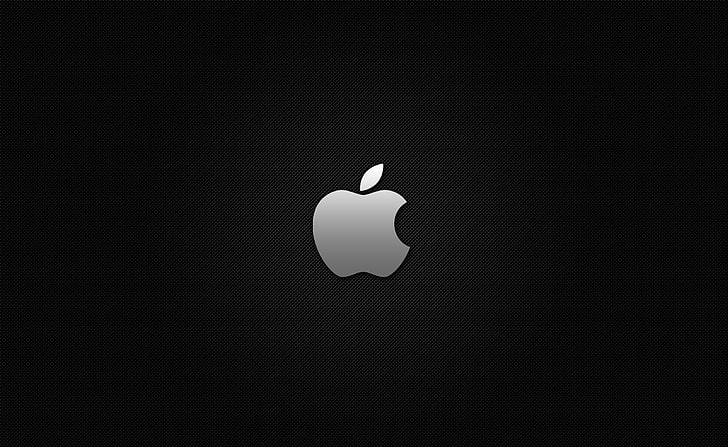

# <font color=indigo> Apple: predicting stock price analysis with Machine learning</font>

<font color=indigo>Table of Content:</font>

. Importing Libraries

. Loading Dataset

. Data PreProcessing

. EDA

. Data Splitting

. Model Training

. Model Evaluation

. Conclusion</font>

<font color=indigo>About the dataset:</font>

            The data used in this project consist of the historical stock prices of AAPL obtained. Data set contains the following variables; Date  (2018 - 2022), Open, High, Low, Close, Adjusted Close and Volume using machine learning models.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


# Import sklearn’s LinearRegression model:
#from sklearn.linear_model import LinearRegression


In [15]:
 df= pd.read_csv('C:\\Users\\\\Downloads\\apple1980-2022.csv') 

In [16]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


Data preprocessing

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [18]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [19]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

In [21]:
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [22]:
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['Date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter
    
    # Add year feature
    data['year'] = data['Date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)
    
    return data

In [24]:
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862


Data visualization

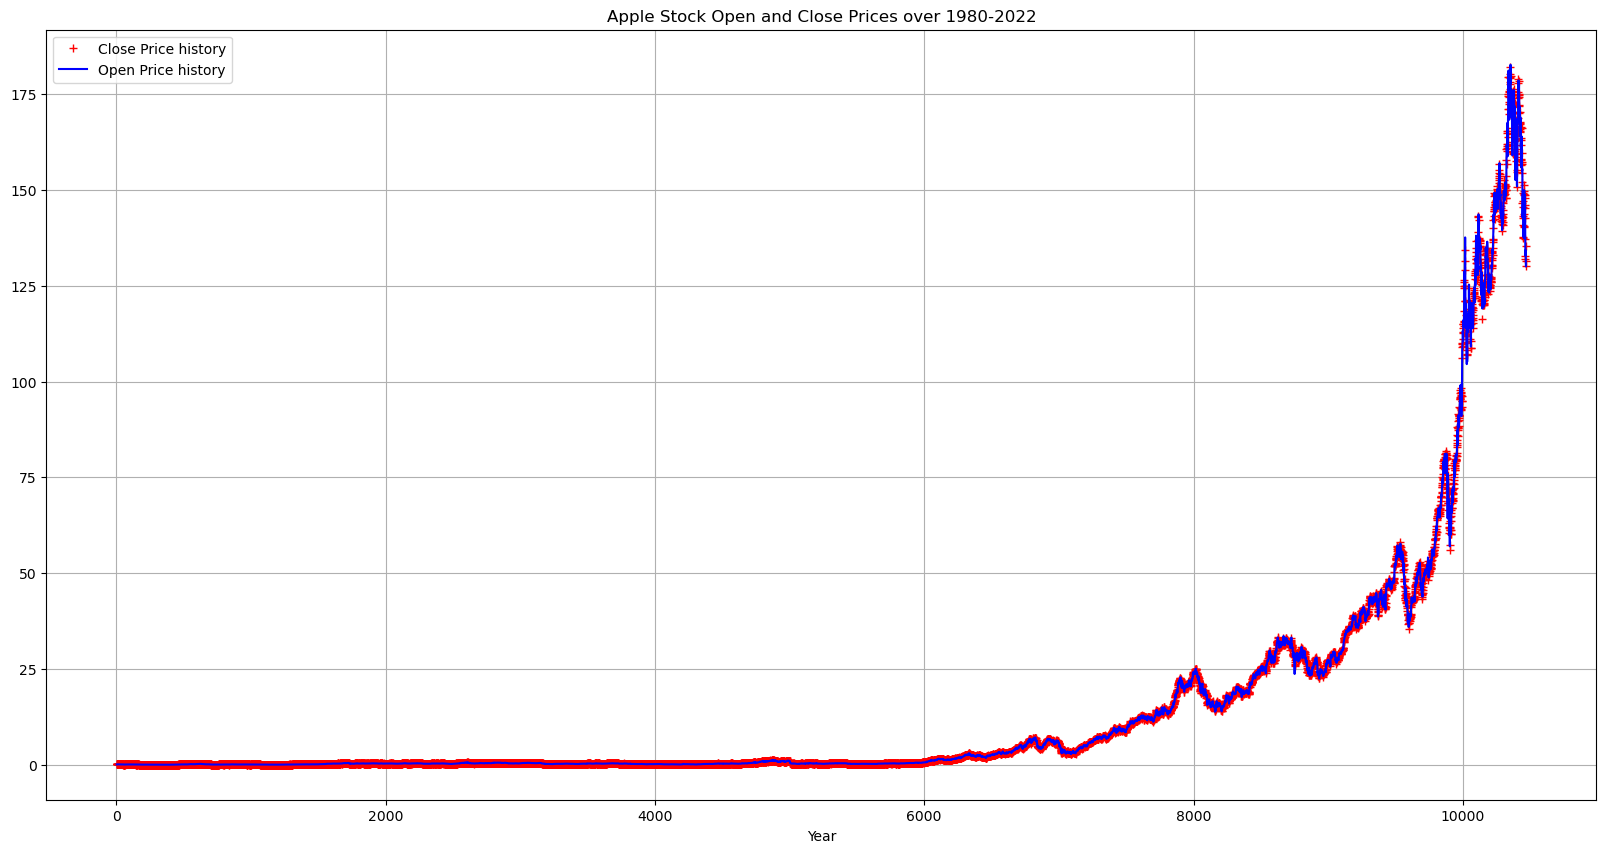

In [25]:
#  Plotting the Apple Stock Open and Close Prices over 1980-2022

plt.figure(figsize=(20,10))
plt.plot(df['Close'],'+r', label='Close Price history')
plt.plot(df['Open'], '-b', label='Open Price history')
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.title("Apple Stock Open and Close Prices over 1980-2022")
plt.show()

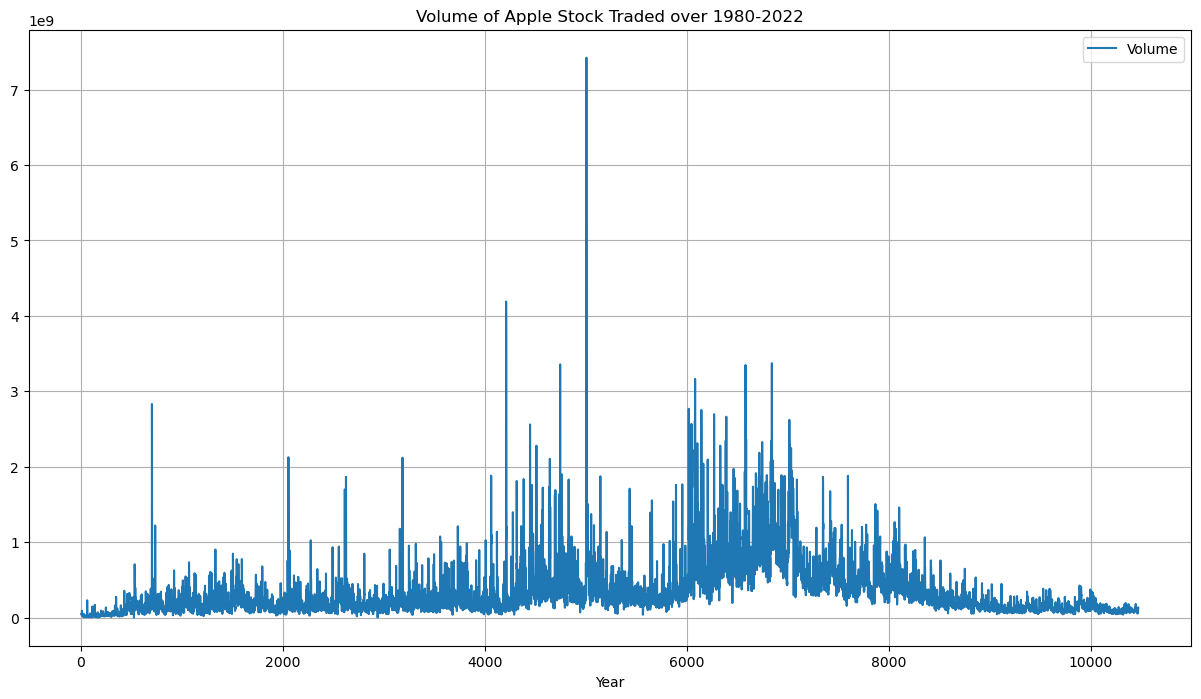

In [26]:
# Plotting Volumes of Stocks 

plt.figure(figsize=(15,8))
plt.plot(df['Volume'], label='Volume',)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.title("Volume of Apple Stock Traded over 1980-2022")
plt.show()

In [27]:
# We can also calculate Market capvalue
df['Market Cap'] = df['Open'] * df['Volume']
df

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5,Market Cap
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348,6.133072e+06
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652,4.941433e+06
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723,6.471408e+06
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513,6.964736e+06
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862,8.807542e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,0,6,2,2022,24,164,137.130005,142.639999,147.960007,148.710007,146.139999,1.623766e+10
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,1,6,2,2022,24,165,131.880005,137.130005,142.639999,147.960007,148.710007,1.128733e+10
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,2,6,2,2022,24,166,132.759995,131.880005,137.130005,142.639999,147.960007,1.229197e+10
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,3,6,2,2022,24,167,135.429993,132.759995,131.880005,137.130005,142.639999,1.428100e+10


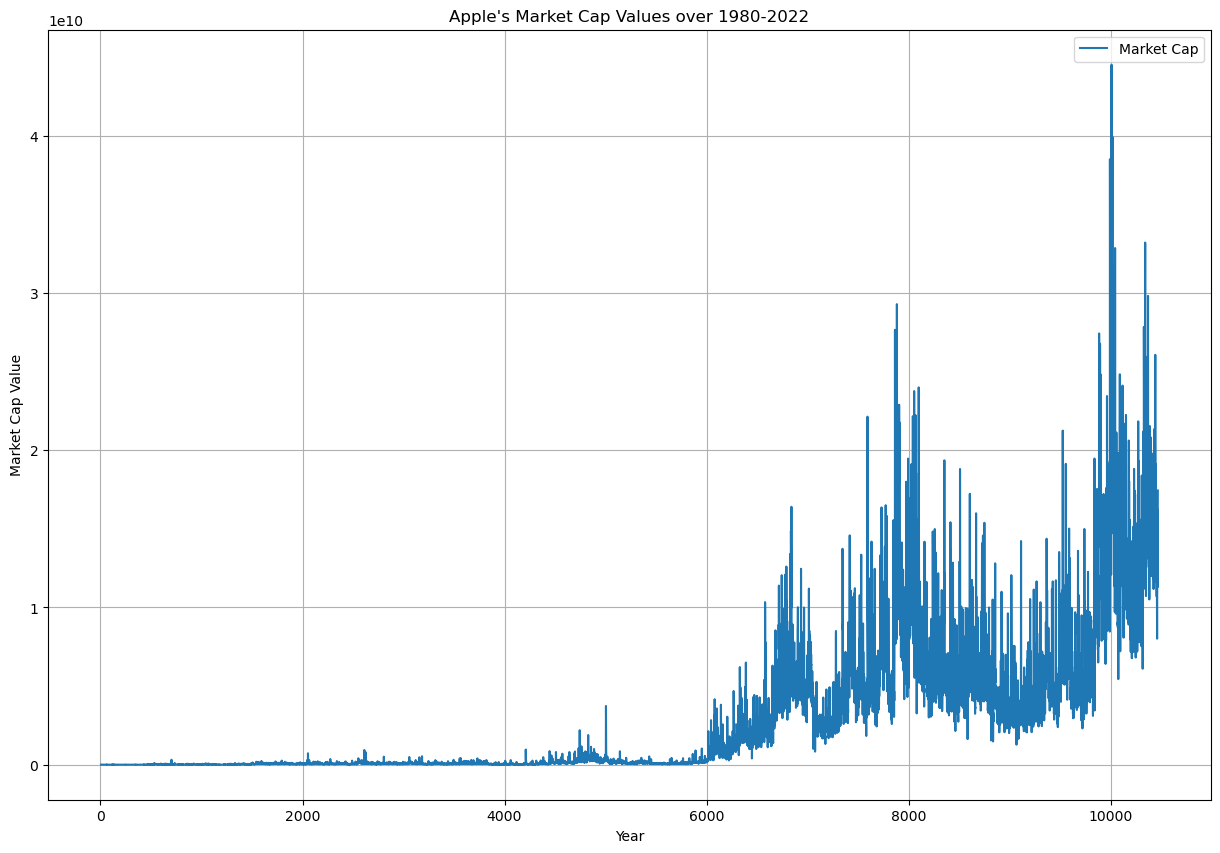

In [28]:
# Plotting Market Cap Value of Apple Stock Over the Years

plt.figure(figsize=(15,10))
plt.plot(df['Market Cap'], label='Market Cap')
plt.legend()
plt.grid()
plt.ylabel('Market Cap Value')
plt.xlabel("Year")
plt.title("Apple's Market Cap Values over 1980-2022")
plt.show()

<Figure size 1000x600 with 0 Axes>

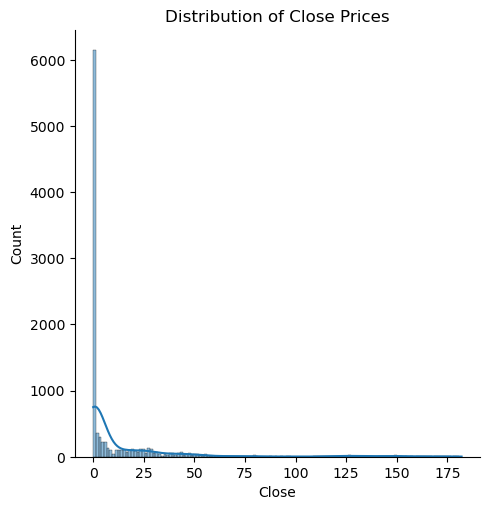

In [41]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

C:\Users\sajin\AppData\Local\Temp\ipykernel_7456\41443649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


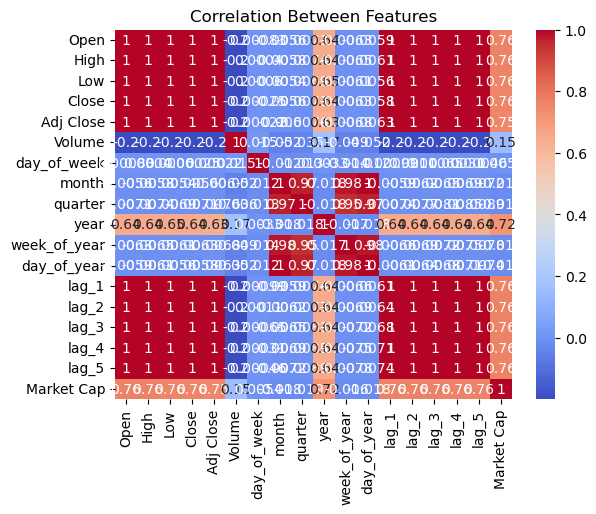

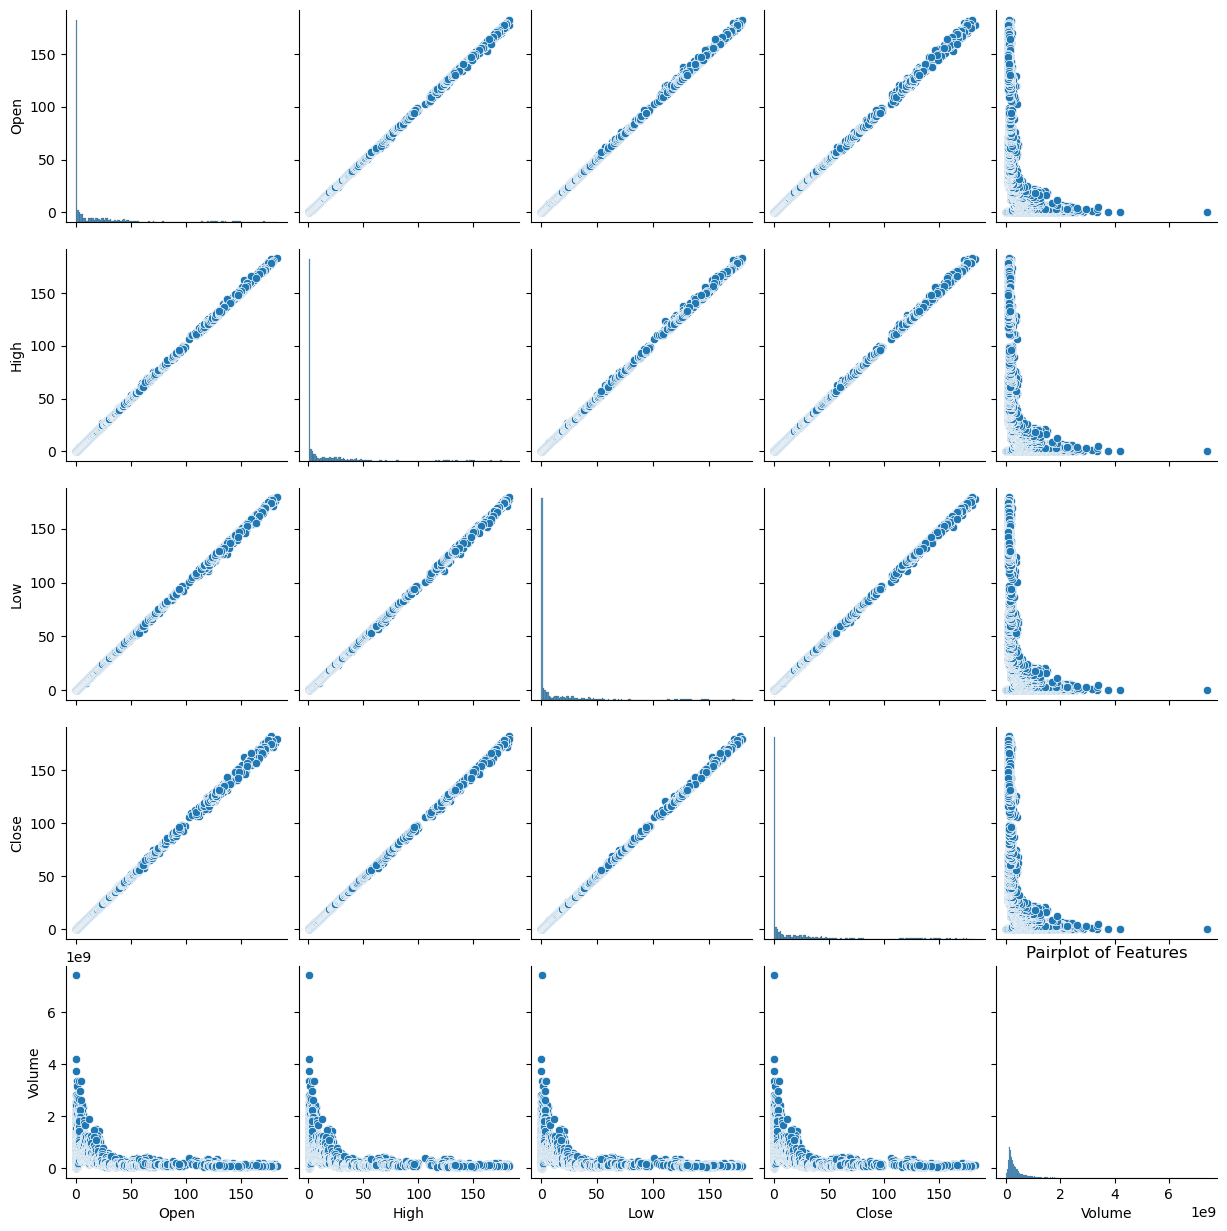

In [40]:


# Heatmap of correlation between features
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()
sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close','Volume'])
plt.title('Pairplot of Features')
plt.show()

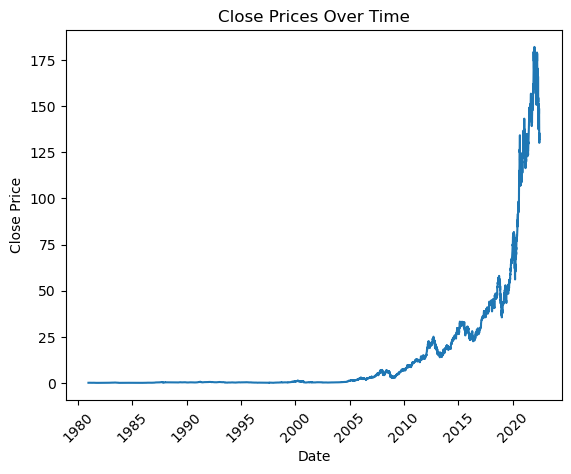

In [32]:
# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


Datasplitting & Train the model

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 965.91
RMSE: 31.08
MAE: 19.45
MAPE: 4091.21%
R2 Score: -0.00



In [34]:
#from sklearn.linear_model import LinearRegression#import library

# Linear Regression Model
lr_model = LinearRegression()#create instance of the model
lr_model.fit(X_train, y_train)#train the model or fitting the linear regression model to the data
y_pred_lr = lr_model.predict(X_test)#predict outcome#add new coloumn#use the model to predict the price or outcome
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)
print('Linear Regression Model:')#display to see the result
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')


Linear Regression Model:
MSE: 0.06
RMSE: 0.25
MAE: 0.07
MAPE: 0.81%
R2 Score: 1.00



In [35]:
#Support Vector Regression Model
#from sklearn.preprocessing import StandardScaler 
#feature scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#from sklearn.svm import SVR #--create your suport vector regression
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR.
#We have a non-linear condition 
#so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
svr_model = SVR(kernel='linear')
#training the model
svr_model.fit(X_train_scaled, y_train)
#predicting a new result
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.17
RMSE: 0.41
MAE: 0.16
MAPE: 21.41%
R2 Score: 1.00



In [36]:
#Random Forest Regression Model


import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
#initializing the random forest regression model with 100 decision tree
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#fitting the random forest regression to the data
rf_model.fit(X_train, y_train)
#predicting target values of test set
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')


Random Forest Regression Model:
MSE: 0.13
RMSE: 0.36
MAE: 0.10
MAPE: 0.87%
R2 Score: 1.00



In [44]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

len_train_data

9940

In [45]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[4.23217323e-04],
       [4.56949847e-04],
       [4.87621274e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [46]:
# Create the training data set 
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        # Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068, 0.00028214, 0.00027601, 0.00029748, 0.00032508])]
[0.00036187996620460543]

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0

In [12]:
#models= ['Baseline', 'Linear Regression', 'Support Vector Regression', 'Random Forest Regression', 'LSTM']
#mse_scores = [mse_baseline, mse_lr, mse_svr, mse_rf, mse_lstm]
#rmse_scores = [rmse_baseline, rmse_lr, rmse_svr, rmse_rf, rmse_lstm]
#mae_scores = [mae_baseline, mae_lr, mae_svr, mae_rf, mae_lstm]
#mape_scores = [mape_baseline, mape_lr, mape_svr, mape_rf, mape_lstm]
#r2_scores = [r2_baseline, r2_lr, r2_svr, r2_rf, r2_lstm]

# Create a dataframe to store the evaluation metrics
#evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
#evaluation_df.set_index('Model', inplace=True)

# Print the evaluation metrics
#print(evaluation_df)